In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [3]:
# Load the prepared data
X = np.load('../data/24hrs/X_24hr.npy')
y = np.load('../data/24hrs/y_24hr.npy')


In [4]:
X.shape

(18131, 48, 52)

In [5]:
y.shape

(18131,)

In [6]:
count_ones = np.sum(y == 1)

count_zeros = np.sum(y == 0)

print(f"Number of 1s: {count_ones}")
print(f"Number of 0s: {count_zeros}")

Number of 1s: 6825
Number of 0s: 11306


In [7]:
X[0].shape

(48, 52)

In [8]:
X[0]

array([[-0.58355812, -0.84382698, -0.88353501, ..., -0.83292097,
        -0.85003792, -0.64633824],
       [-0.58355812, -0.84382698, -0.88353501, ..., -0.83292097,
        -0.85003792, -0.64633824],
       [-0.58355812, -0.84382698, -0.88353501, ..., -0.83292097,
        -0.85003792, -0.64633824],
       ...,
       [ 1.71362538,  0.05990531,  1.09850294, ...,  0.98941435,
         1.05553278,  2.23945962],
       [ 1.71362538,  0.05990531,  1.09850294, ...,  0.98941435,
         1.05553278,  2.32771402],
       [ 1.71362538,  0.05990531,  1.09850294, ...,  0.98941435,
         1.05553278,  2.39541602]])

In [9]:
X[0][15]

array([-0.58355812, -0.84382698, -0.88353501, -0.83124718, -0.00685788,
       -0.00812086, -0.00287852, -0.03979434, -0.18630357, -0.1452517 ,
       -0.89168024, -0.88469119, -0.77631171, -0.879399  , -0.89105746,
       -0.79453444, -0.87953597, -0.89176072, -0.89189396, -0.87724095,
       -0.86195229, -0.86861972, -0.42147352, -0.89045155, -0.89148484,
       -0.89127912, -0.8915562 , -0.54301398, -0.89149974, -0.58228106,
       -0.88119599, -0.86393651, -0.88717492, -0.89160915, -0.89150122,
       -0.75165601, -0.88896169, -0.88719098, -0.8905254 , -0.88986258,
       -0.88629035, -0.44595227, -0.84133061, -0.89108609, -0.02745244,
       -0.01934372, -0.89088658, -0.84861785, -0.88814788, -0.83292097,
       -0.85003792, -0.64633824])

In [10]:
unique_values, counts = np.unique(y, return_counts=True)

# Print the results
for value, count in zip(unique_values, counts):
    print(f'Value {value} occurs {count} times')

Value 0 occurs 11306 times
Value 1 occurs 6825 times


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:

# Define the model
model = Sequential()

# First LSTM layer with dropout and return sequences for stacking
model.add(LSTM(64, activation='relu', input_shape=(48, 52), return_sequences=True))
  # Dropout for regularization

# Second LSTM layer
model.add(LSTM(64, activation='relu', return_sequences=True))

# Third LSTM layer without return_sequences
model.add(LSTM(32, activation='relu'))

# Fully connected dense layer
model.add(Dense(32, activation='relu'))

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()





# # Define the model
# model = Sequential()
# model.add(LSTM(128, activation='relu', input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
# model.add(LSTM(50, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
# history = model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

# # Save the model
# model.save('lstm_model.h5')

C:\Users\SAIFUL_BADHON\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 48, 64)              │          29,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 48, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 76,481 (298.75 KB)

 Trainable params: 76,481 (298.75 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:

# Compile the model
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Add Early Stopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

# Save the model
# model.save('lstm_model_advanced.h5')



Epoch 1/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.6607 - loss: 0.6402 - val_accuracy: 0.6649 - val_loss: 0.6377
Epoch 2/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.6633 - loss: 0.6381 - val_accuracy: 0.6649 - val_loss: 0.6377
Epoch 3/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.6573 - loss: 0.6427 - val_accuracy: 0.6649 - val_loss: 0.6375
Epoch 4/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.6576 - loss: 0.6420 - val_accuracy: 0.6649 - val_loss: 0.6376
Epoch 5/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.6589 - loss: 0.6411 - val_accuracy: 0.6649 - val_loss: 0.6375
Epoch 6/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.6551 - loss: 0.6436 - val_accuracy: 0.6649 - val_loss: 0.6376
Epoch 7/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6565 - loss: 0.6435 - val_accuracy: 0.6649 - val_loss: 0.6376
Epoch 8/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.6594 - loss: 0.6399 - val_accu

In [30]:
# Step 3: Evaluate the model
from sklearn.metrics import precision_score,recall_score,f1_score

y_pred_proba = model.predict(X_test)

y_pred = (model.predict(X_test) > 0.5).astype(int)

# Print precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')



114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Precision: 0.67
Recall: 0.19
F1 Score: 0.29


In [32]:

np.save('../Scores/validation_loss/L24-VL.npy', np.array(history.history['val_loss']))
np.save('../Scores/validation_accuracy/L24-VA.npy', np.array(history.history['val_accuracy']))
np.save('../Scores/training_accuracy/L24-TA.npy', np.array(history.history['accuracy']))
np.save('../Scores/training_loss/L24-TL.npy', np.array(history.history['loss']))


np.save('../Scores/ROC-PRC/L24-y_test.npy', np.array(y_test))
np.save('../Scores/ROC-PRC/L24-y_pred.npy', np.array(y_pred))
np.save('../Scores/ROC-PRC/L24-y_pred_proba.npy', np.array(y_pred_proba))


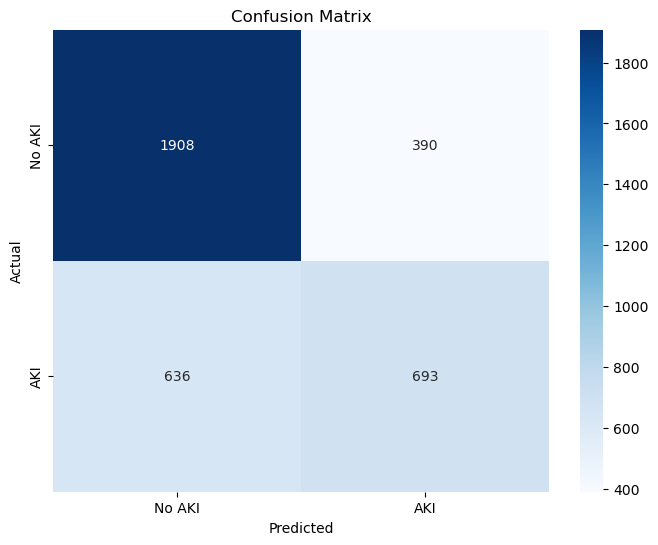

In [26]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No AKI', 'AKI'], yticklabels=['No AKI', 'AKI'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

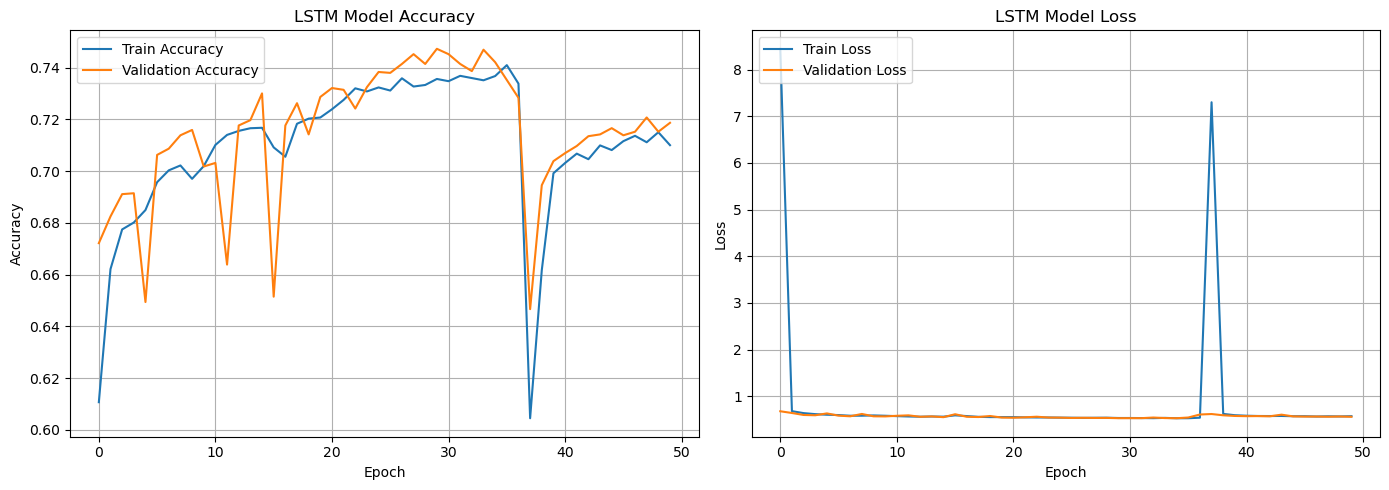

In [27]:
import matplotlib.pyplot as plt


# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid()

plt.tight_layout()
plt.show()


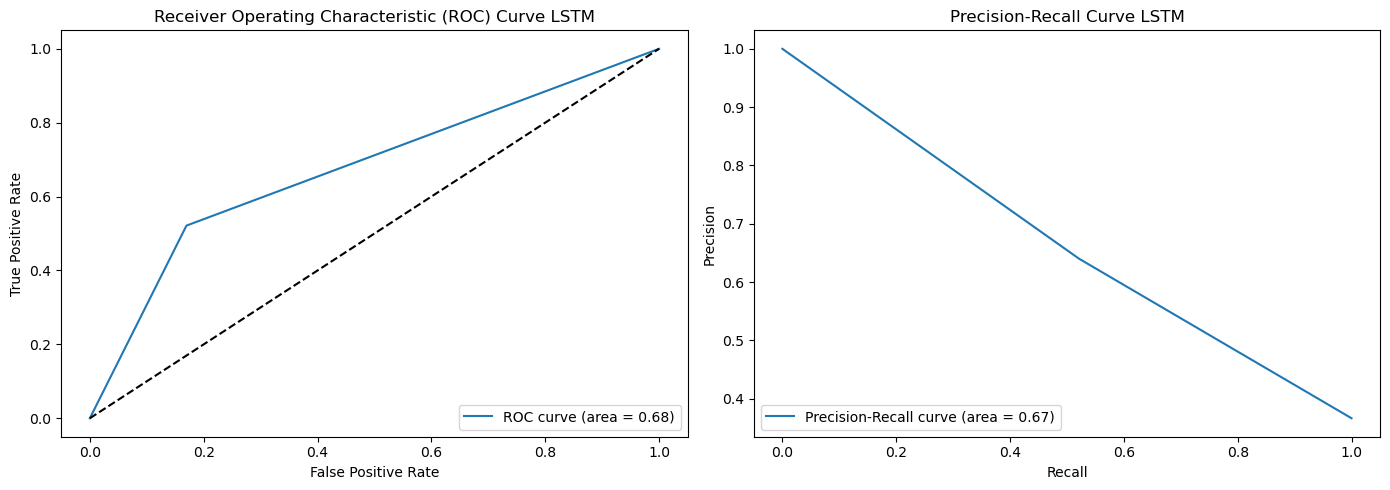

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

# Assuming y_true are the true labels and y_scores are the predicted probabilities

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auroc = roc_auc_score(y_test, y_pred)

# Calculate Precision-Recall curve and AUPRC
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
auprc = auc(recall, precision)

# Plot ROC curve
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auroc)
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Receiver Operating Characteristic (ROC) Curve LSTM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Plot Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label='Precision-Recall curve (area = %0.2f)' % auprc)
plt.title('Precision-Recall Curve LSTM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()
